In [28]:
# 画图(好像不太对，和书上画出来的图不一样，待修改)

import matplotlib.pyplot as plt
def lg_plot(clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.show()

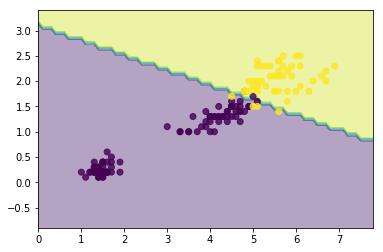

In [29]:
# 线性SVM分类
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline((
            ("scaler", StandardScaler()),
            ("linear_svc", LinearSVC(C=1, loss="hinge")),
        ))
            
svm_clf.fit(X, y)
lg_plot(svm_clf)

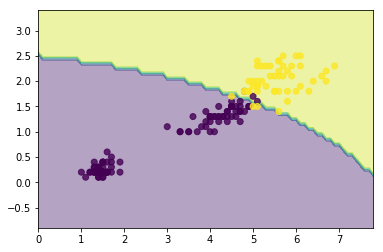

In [30]:
# 添加多项式特性，然后线性分类
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline((
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=1, loss="hinge")),
    ))
polynomial_svm_clf.fit(X, y)
lg_plot(polynomial_svm_clf)

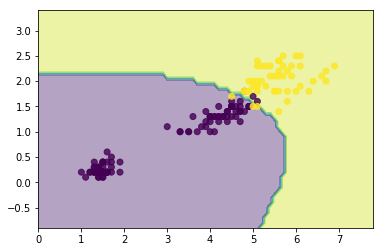

In [31]:
#使用多项式核
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(C=5, kernel="poly", degree=3, coef0=1)) # SVC没有损失函数？
    ))
poly_kernel_svm_clf.fit(X, y)
lg_plot(poly_kernel_svm_clf)

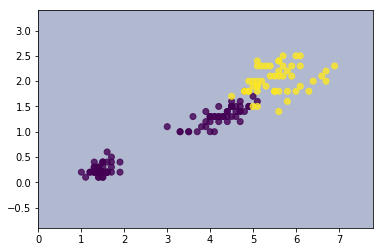

In [32]:
#高斯RBF核函数
rbf_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ))
rbf_kernel_svm_clf.fit(X, y)
lg_plot(rbf_kernel_svm_clf)